### Student Details

Student name: **Siddharth Prince**

Student ID: **23052058**

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Task 1: Implement Logistic Regression 

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [2]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) + 
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [3]:
################################
# Class stub for you to fill the rest of the code

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return self.activation(np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, z):
        return 1/(1 + np.exp(-z))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.5, 1, 0)

### Reading the data set

In [4]:
df = pd.read_csv('./DataSets/iris_data.csv', header=0)

df.head()

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

### Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

### Training the logistic regression model

In [7]:
model = LogisticRegressionGD()
model.train(X_train, y_train)

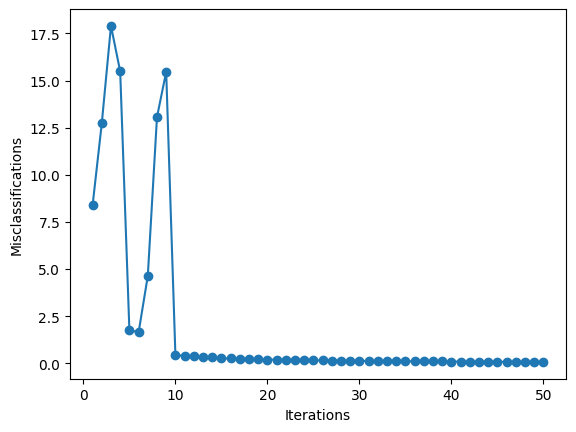

In [8]:
plt.plot(range(1, len(model.cost_)+1), model.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

### Observation:
The model does seem to go back and forth when trying to minimise the error as we had observed with the previous Etivities, but the Logistic regression model seems to be able to do a significantly better job at being able to alter the weights in just the right amounts to arrive at the best error rate here (also, the data set affects this where last time, it was the height and weight data).

### Calculating the accuracy using test data

In [9]:
from sklearn.metrics import accuracy_score

prediction = model.predict(X_test)
# print(prediction)
# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, prediction)*100:.2f}%') 

Accuracy: 100.00%


(<Figure size 640x480 with 1 Axes>, <Axes: >)

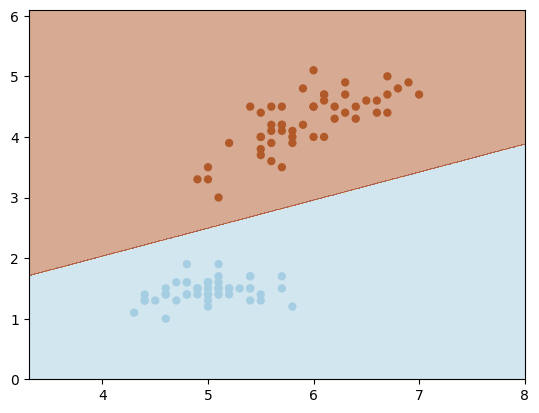

In [10]:
from plot_decision_boundary import plot_decision_boundary

################################
# Your code here
plot_decision_boundary(X=X, y=y, model=model)

The decision boundary seems to be well fit for the data represented!

# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

### 1. Encoding the classes
Figured it would be better not to re-invent the wheel and use the very convenient tools that Scikit Learn provides. :)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Getting the petal length and petal width
X = df.iloc[:, [2,3]].values
# Getting the label column
y = df.iloc[:, 4]
# Encoding the classes to ints
y_encoded = LabelEncoder().fit_transform(y)
# print(list(zip(y, y_encoded)))

### 3. Scaling the data

Scaling X fully first before splitting into train and test data because that seems more straightforward.

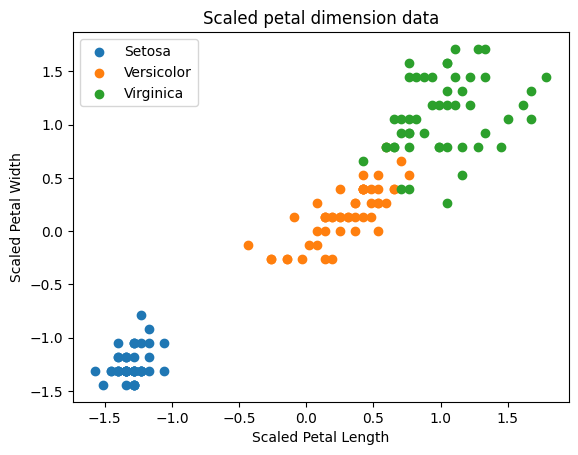

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plotting the scaled data
plt.scatter(X_scaled[y_encoded == 0, 0], X_scaled[y_encoded == 0, 1], label='Setosa')
plt.scatter(X_scaled[y_encoded == 1, 0], X_scaled[y_encoded == 1, 1], label='Versicolor')
plt.scatter(X_scaled[y_encoded == 2, 0], X_scaled[y_encoded == 2, 1], label='Virginica')
plt.xlabel('Scaled Petal Length')
plt.ylabel('Scaled Petal Width')
plt.title('Scaled petal dimension data')
plt.legend()
plt.show()

### 2. Train/Test Split

In [13]:
from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.30, random_state=42, stratify=y_encoded) 

### 4. Training Sklearn's Logistic Regression model with the data

In [14]:
from sklearn.linear_model import LogisticRegression

################################
# Your code here
sk_lr_model = LogisticRegression(max_iter=100)
sk_lr_model.fit(X_train, y_train)

LogisticRegression()

### 5. Plotting the decision boundary

(<Figure size 640x480 with 1 Axes>, <Axes: >)

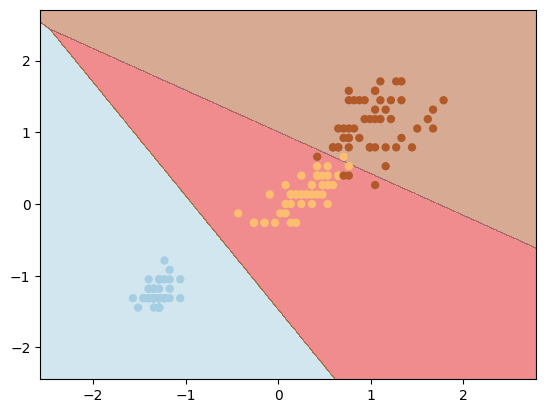

In [15]:
from plot_decision_boundary import plot_decision_boundary

################################
# Your code here

plot_decision_boundary(X=X_scaled, y=y_encoded, model=sk_lr_model)

### 6. Calculating the accuracy score

In [16]:
sk_lr_prediction = sk_lr_model.predict(X_test)

# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, sk_lr_prediction)*100:.2f}%') 

Accuracy: 91.11%


### Experimenting with different regularisation parameters

#### C = 0.01

In [17]:
from sklearn.linear_model import LogisticRegression

################################
# Your code here
sk_lr_model_c_001 = LogisticRegression(C=0.01, max_iter=100)
sk_lr_model_c_001.fit(X_train, y_train)

LogisticRegression(C=0.01)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

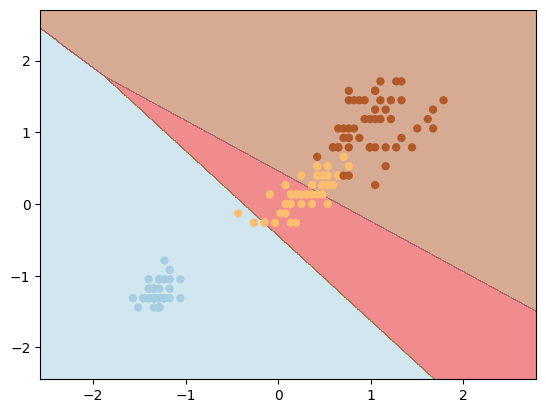

In [18]:
from plot_decision_boundary import plot_decision_boundary

################################
# Your code here

plot_decision_boundary(X=X_scaled, y=y_encoded, model=sk_lr_model_c_001)

In [19]:
sk_lr_prediction_c_001 = sk_lr_model_c_001.predict(X_test)

# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, sk_lr_prediction_c_001)*100:.2f}%') 

Accuracy: 75.56%


#### C = 0.1

In [20]:
from sklearn.linear_model import LogisticRegression

################################
# Your code here
sk_lr_model_c_01 = LogisticRegression(C=0.1, max_iter=100)
sk_lr_model_c_01.fit(X_train, y_train)

LogisticRegression(C=0.1)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

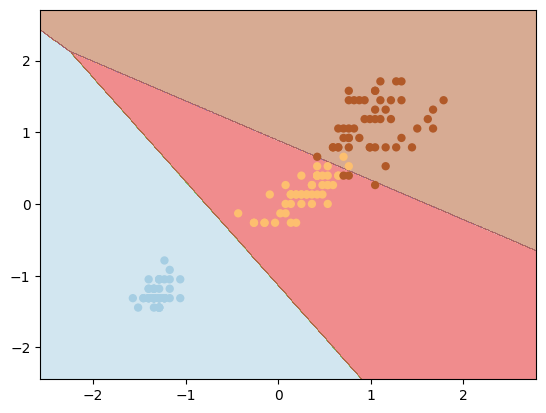

In [21]:
from plot_decision_boundary import plot_decision_boundary

################################
# Your code here

plot_decision_boundary(X=X_scaled, y=y_encoded, model=sk_lr_model_c_01)

In [22]:
sk_lr_prediction_c_01 = sk_lr_model_c_01.predict(X_test)

# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, sk_lr_prediction_c_01)*100:.2f}%') 

Accuracy: 93.33%


#### C = 10

In [23]:
from sklearn.linear_model import LogisticRegression

################################
# Your code here
sk_lr_model_c_10 = LogisticRegression(C=10, max_iter=100)
sk_lr_model_c_10.fit(X_train, y_train)

LogisticRegression(C=10)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

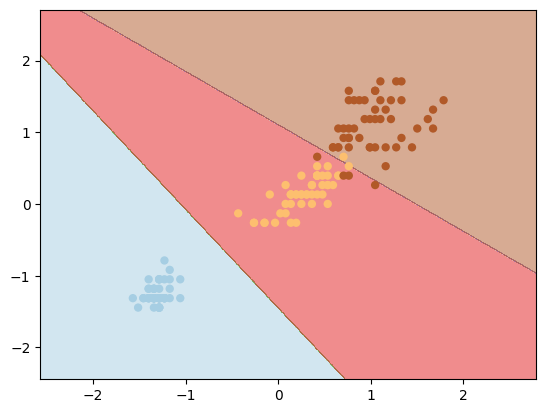

In [24]:
from plot_decision_boundary import plot_decision_boundary

################################
# Your code here

plot_decision_boundary(X=X_scaled, y=y_encoded, model=sk_lr_model_c_10)

In [25]:
sk_lr_prediction_c_10 = sk_lr_model_c_10.predict(X_test)

# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, sk_lr_prediction_c_10)*100:.2f}%') 

Accuracy: 91.11%


#### C = 100

In [26]:
from sklearn.linear_model import LogisticRegression

################################
# Your code here
sk_lr_model_c_100 = LogisticRegression(C=100, max_iter=100)
sk_lr_model_c_100.fit(X_train, y_train)

LogisticRegression(C=100)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

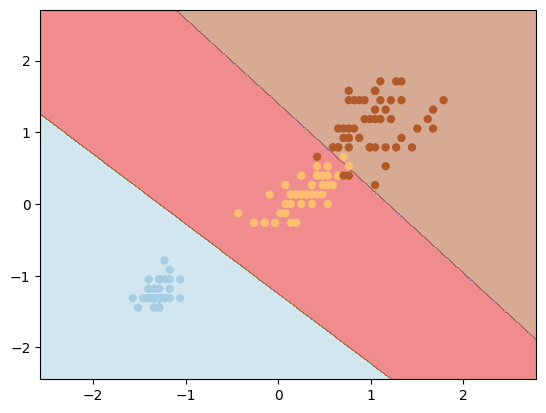

In [27]:
from plot_decision_boundary import plot_decision_boundary

################################
# Your code here

plot_decision_boundary(X=X_scaled, y=y_encoded, model=sk_lr_model_c_100)

In [28]:
sk_lr_prediction_c_100 = sk_lr_model_c_100.predict(X_test)

# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, sk_lr_prediction_c_100)*100:.2f}%') 

Accuracy: 93.33%


#### C = 5000

In [29]:
from sklearn.linear_model import LogisticRegression

################################
# Your code here
sk_lr_model_c_5000 = LogisticRegression(C=5000, max_iter=100)
sk_lr_model_c_5000.fit(X_train, y_train)

LogisticRegression(C=5000)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

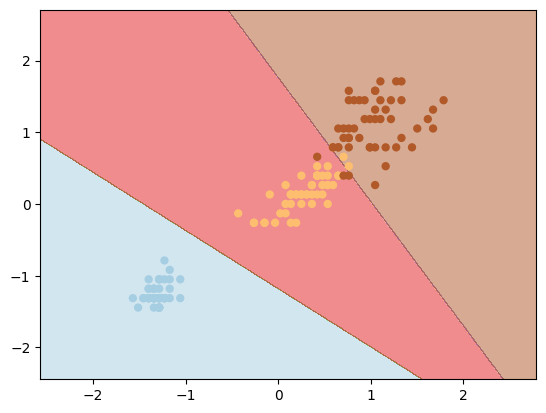

In [30]:
# Already imported
# from plot_decision_boundary import plot_decision_boundary

################################
# Your code here

plot_decision_boundary(X=X_scaled, y=y_encoded, model=sk_lr_model_c_5000)

In [31]:
sk_lr_prediction_c_5000 = sk_lr_model_c_5000.predict(X_test)

# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, sk_lr_prediction_c_5000)*100:.2f}%') 

Accuracy: 93.33%


<span style="color:red">Insert your text answers below</span>.

#### Observations on the effect of regularisation:

The "C" parameter of the LogisticRegression class of Scikit-Learn controls the **inverse** of regularisation ($\lambda$). Regularisation according to my understanding is how losely or tightly a model fits to the data provided. In other words, tweaking this parameter directly addresses the degree of fitness i.e, if the model has been fit fairly well, not well enough to where significant number of new data points get misclassified. This could either be because it does not do a good job classifying even the existing training data (under-fitting problem) or it does "too good" of a job classifying the existing data to a point where a new data point that slightly deviates from the existing pattern results in a misclassification (over-fitting problem).  

With respect to the "C" parameter here, since it has an inverse relation to regularisation, the lower the value, the higher the degree of regularisation which means model will be encouraged to find simpler decision boundaries. So, too less of a value would result in under-fitting of the model as we see in the very first instance where we set C to 0.01 which resulted in a significantly worse accuracy of 75.56%.  

A higher value of "C" encourages the model to conform its decision boundaries more to the currently available data to try and maximise the accuracy. As with "C" values of 100 and 5000 above, we can see that the decision boundaries (especially between the versicolor and verginica classes) changing to find an orientation that would try to get all data points within their respective class boundaries. Though the computed accuracy scores for these models are constant at 93.33%, we can visually see that if there is a new data point with a slighly longer petal length measure, though it would make sense for it to be classified as versicolor, it could be more easily misclassified as virginica.  

The "C" values of 0.1, the original default (1.0) and 10 are more in between and try to create decision boundaries that have the best of both worlds. While the default and C=10 had a lesser accuracy score of 91.11%, C=0.1 had an accuracy of 93.33% and had a decision boudary which to me seems like the best out of the three.

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

### Steps 1-3 Loading and encoding Iris data, Scaling data, splitting to train/test data
Already did these steps in task 2. Hence, I'll be re-using the same variables.

### 4. Training Sklearn's SVM model using the data

In [32]:
from sklearn.svm import SVC

sk_svm_model = SVC(kernel='linear', max_iter=100)
sk_svm_model.fit(X_train, y_train)

SVC(kernel='linear', max_iter=100)

### 5. Plotting the decision boundary

(<Figure size 640x480 with 1 Axes>, <Axes: >)

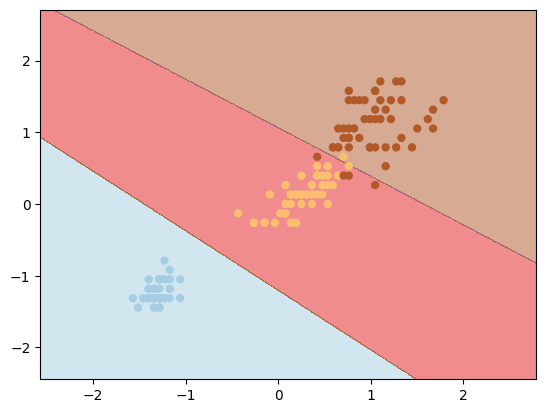

In [33]:
plot_decision_boundary(X=X_scaled, y=y_encoded, model=sk_svm_model)

### 6. Calculating the accuracy score

In [34]:
sk_svm_prediction = sk_svm_model.predict(X_test)

# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, sk_svm_prediction)*100:.2f}%') 

Accuracy: 91.11%


# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution 

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function 

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

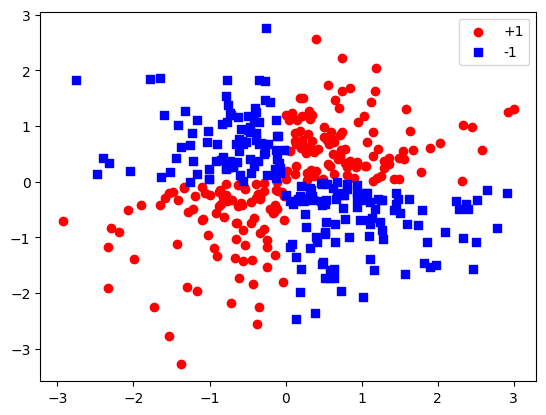

In [35]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

<span style="color:red">Insert your code below</span>.

### 1. Training Scikit Learn's SVC model on the above generated data with gamma=0.1

In [36]:
################################
# Your code here

sk_svm_rbf_model = SVC(kernel='rbf', gamma=0.1) # Choosing a gamma value of 0.1
sk_svm_rbf_model.fit(X_r, y_r)

SVC(gamma=0.1)

### 2. Plotting the decision boundaries for the model

(<Figure size 640x480 with 1 Axes>, <Axes: >)

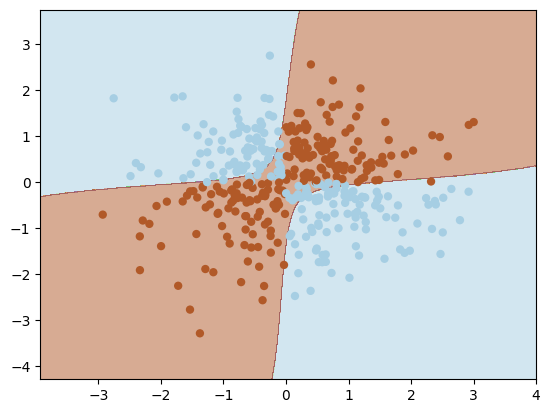

In [37]:
plot_decision_boundary(X=X_r, y=y_r, model=sk_svm_rbf_model)

### 3. Changing the gamma value to 100

(<Figure size 640x480 with 1 Axes>, <Axes: >)

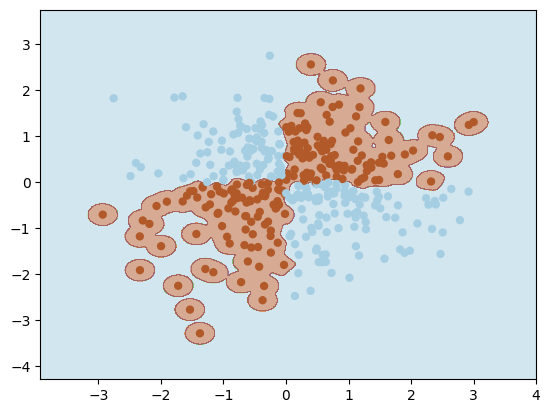

In [38]:
sk_svm_rbf_model_gamma_100 = SVC(kernel='rbf', gamma=100) # Choosing a gamma value of 100
sk_svm_rbf_model_gamma_100.fit(X_r, y_r)

plot_decision_boundary(X=X_r, y=y_r, model=sk_svm_rbf_model_gamma_100)

### 3. [Extra] Keeping the gamma value to the default

(<Figure size 640x480 with 1 Axes>, <Axes: >)

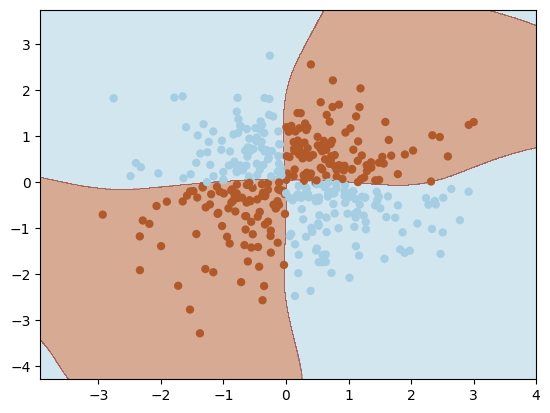

In [39]:
sk_svm_rbf_model_gamma_scaled = SVC(kernel='rbf') # keeping gamma value to the default of 'scaled'
sk_svm_rbf_model_gamma_scaled.fit(X_r, y_r)

plot_decision_boundary(X=X_r, y=y_r, model=sk_svm_rbf_model_gamma_scaled)

### Observations:

When having the gamma value as 0.1, it produced a good decision boundary which visually makes sense since the data points seem to be classified according to an XOR function where if both scales are positive or negative, it is +1 and if it is either or, it is -1. So, this decision boundary is drawn to reflect such a distribution.  

With the gamma parameter set to 100, however, the decision boundaries have been hyper localised to all the data points to the extent where there are boundaries surrounding one or two individual data points. This is a classic example of a model that has been over-fitted to the training data set.  

The default option produces a decision boundary that best fits all the current data points and seems to be the most accurate, but it might still have a tough time with data points that might stray off more towards the corners in their quadrants. The gamma = 0.1 version still does have many misclassifications towards the centre to be fair though. So, more experimentations with different gamma values might be warranted for a model that would be well fit for the training data and any other new data the model might be subject to.

### Training a non-linear SVM model on the Iris data set

In [40]:
sk_svm_rbf_model_iris = SVC(kernel='rbf', gamma=0.1) # Choosing a gamma value of 0.1
sk_svm_rbf_model_iris.fit(X_train, y_train)

SVC(gamma=0.1)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

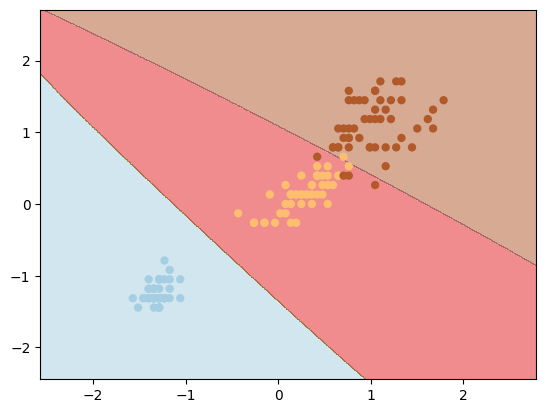

In [41]:
plot_decision_boundary(X=X_scaled, y=y_encoded, model=sk_svm_rbf_model_iris)

In [42]:
# Calculating accuracy
sk_svm__rbf_prediction_iris = sk_svm_rbf_model_iris.predict(X_test)

# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, sk_svm__rbf_prediction_iris)*100:.2f}%') 

Accuracy: 91.11%


Trying with the gamma value left to the default of 'scaled'

In [43]:
sk_svm_rbf_model_iris_gamma_scaled = SVC(kernel='rbf') # Leaving the gamma value to the default value
sk_svm_rbf_model_iris_gamma_scaled.fit(X_train, y_train)

SVC()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

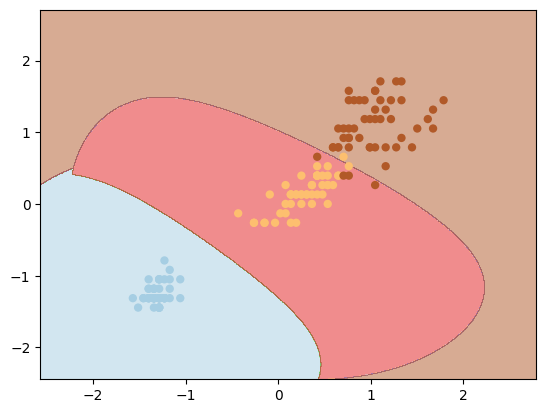

In [44]:
plot_decision_boundary(X=X_scaled, y=y_encoded, model=sk_svm_rbf_model_iris_gamma_scaled)

In [45]:
# Calculating accuracy
sk_svm_rbf_prediction_iris_gamma_scaled = sk_svm_rbf_model_iris_gamma_scaled.predict(X_test)

# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, sk_svm_rbf_prediction_iris_gamma_scaled)*100:.2f}%') 

Accuracy: 91.11%


### Observations:

The trained SVM models with non-linear kernels seem to be doing on par with the trained Logistic Regression models and infact slightly worse than the max accuracy I managed to gain from the LR model with "C set to 0.1 and a good decision boundary. This suggests to me that not all data needs to be fit to non-linear models if not necessary. Ultimately, it is up to us to come to a logical conclusion on what to use best. :)